<a href="https://colab.research.google.com/github/phmouras/Projeto_Pos/blob/main/Eq_onda_gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Método pseudoespectral para a equação da onda unidimensional




N = 500

L0 = 50

col = np.cos(np.arange(N)*math.pi / (N-1))     # pontos de colocação
x = L0 * np.arctanh(col)                       # mapeamento   

xcol = (1 - np.tanh(x/L0)**2)/L0              # dcol/dx
xxcol = -(2*np.tanh(x/L0)*(1-np.tanh(x/L0)**2))/L0**2   # d^2 col / dx^2

# Matriz base:

T = np.zeros([N+2,N])
xT = np.zeros([N+2,N])
xxT = np.zeros([N+2,N])
colT = np.zeros([N+2,N])
ccolT = np.zeros([N+2,N])  


T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

colT[0,] = 0
colT[1,] = 1
xT[0,] = xcol*colT[0,]
xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
  xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx


ccolT[0,] = 0
ccolT[1,] = 0
xxT[0,] = xxcol*colT[0,] + (xcol)**2 * ccolT[0,]
xxT[1,] = xxcol*colT[1,] + (xcol)**2 * ccolT[1,]

for i in range(2, N+2):
  ccolT[i,] = 2*colT[i-1,] + 2*col*ccolT[i-1,] + 2*colT[i-1,] - ccolT[i-2,]
  xxT[i,] = xxcol*colT[i,] + (xcol)**2 * ccolT[i,]                         # ccolT[i,] = d²T[i,]/dcol²



psi = T[0:N,:]   
xpsi = xT[0:N,:]
xxpsi = xxT[0:N,:]


# Condicoes iniciais
x0 = 0

f_onda0 = np.exp(-(x-x0)**2)                # dado inicial da eq. da onda



inv_psi = np.linalg.inv(psi)
  


a0 = np.dot(f_onda0, inv_psi)  # coeficientes a(0)


phi = np.dot(a0, psi)          # solução exata em t=0


# Derivada temporal de psi para t = 0



dtf_onda0 = -2*np.exp(-x**2) * 0 

da = np.dot(dtf_onda0, inv_psi) * 0


In [45]:
# Plot: Condições Iniciais

M = 3000

xplot = np.linspace(-15,15,M)

colplot = np.tanh(xplot/L0)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N,:] 


xplot0 = 0


f_ondaplot0 = np.exp(-(xplot-x0)**2)  

dtf_ondaplot0 = -2*xplot*np.exp(-xplot**2) 

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_ondaplot0)

dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

np.shape(f_ondaplot0)

(3000,)

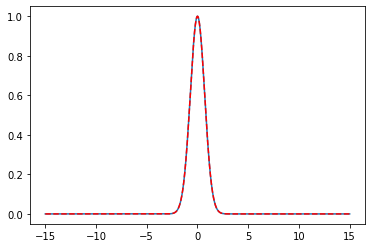

In [4]:
plt.plot(xplot, phiplot, xplot, f_ondaplot0, "--r")
plt.show()

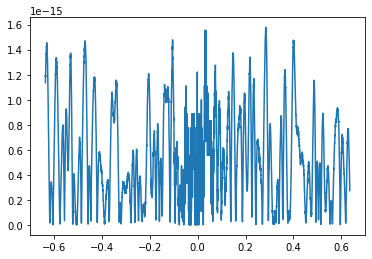

In [5]:
plt.plot(colplot, erro)

In [46]:
h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It + 1)

phi_set = np.zeros([It,M])



#phi0_set = np.zeros([0,It])



for i in range(It):  # Runge Kutta 4th order

  phi = np.dot(a0, psi)
  dda = np.dot(np.dot(a0, xxpsi), inv_psi)
  L1 = h*(da)
  K1 = h*(dda)

  phi = np.dot(a0 + L1/2, psi)
  dda = np.dot(np.dot(a0 + L1/2, xxpsi), inv_psi) 
  L2 = h*(da + K1/2)
  K2 = h*(dda)

  phi = np.dot(a0 + L2/2, psi)
  dda = np.dot(np.dot(a0 + L2/2, xxpsi), inv_psi)  
  L3 = h*(da + K2/2)
  K3 = h*(dda)

  phi = np.dot(a0 + L3, psi)
  dda = np.dot(np.dot(a0 + L3, xxpsi), inv_psi) 
  L4 = h*(da + K3)
  K4 = h*(dda) 
  
  da = da + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  phi_set[i,:] = np.dot(a0, psiplot)
 

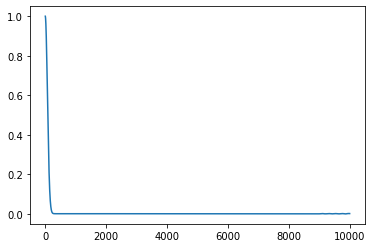

In [32]:
#Campo na origem


plt.plot(phi_set[:,M//2])

 98%|█████████▊| 40/41 [00:02<00:00, 15.41it/s]


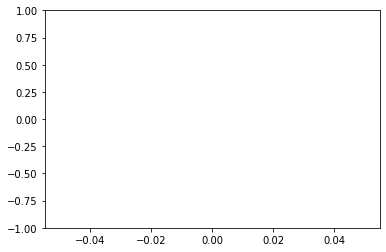

In [49]:
# Movie plot:

from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

# numpy array
x = t

# duration of the video
duration = 2

# matplot subplot
fig, ax = plt.subplots()

# method to get frames
def make_frame(t):

  ax.clear()

  ax.plot( phi_set[:, :])
  ax.set_ylim(-1, 1)

  # returning numpy image
  return mplfig_to_npimage(fig)

# creating animation
animation = VideoClip(make_frame, duration = duration)

# displaying animation with auto play and looping
animation.ipython_display(fps = 20, loop = True, autoplay = True)